# **Программирование с применением массивов**

С помощью массивов NumPy многие виды обработки данных можно записать очень кратко, не прибегая к циклам. Такой способ замены яаных циклов выражениями-массивами обычно называется *векторизацией*. Вообще, векторные операции с массивами выполняются на один-два (а то и больше) порядка быстрее, чем эквивалентные операции на чистом Python.

В качестве простого примера предположим, что нужно вычислить функцию `sqrt(x^2+y^2)` на регулярной сетке. Функция `np.meshgrid` принимает два одномерных массива и порождает две двумерные матрицы, соответствующие парам `(x, y)` элементов, взятых из обоих массивов:

In [2]:
import numpy as np

In [3]:
points = np.arange(-100,100,0.1) # 1000 равностоящих точек от -5 по 4.99
xs, ys = np.meshgrid(points,points) #функция принимает два массива points и порождает две матрицы xs и ys

In [4]:
xs

array([[-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9],
       [-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9],
       [-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9],
       ...,
       [-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9],
       [-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9],
       [-100. ,  -99.9,  -99.8, ...,   99.7,   99.8,   99.9]])

In [5]:
ys

array([[-100. , -100. , -100. , ..., -100. , -100. , -100. ],
       [ -99.9,  -99.9,  -99.9, ...,  -99.9,  -99.9,  -99.9],
       [ -99.8,  -99.8,  -99.8, ...,  -99.8,  -99.8,  -99.8],
       ...,
       [  99.7,   99.7,   99.7, ...,   99.7,   99.7,   99.7],
       [  99.8,   99.8,   99.8, ...,   99.8,   99.8,   99.8],
       [  99.9,   99.9,   99.9, ...,   99.9,   99.9,   99.9]])

Теперь для вычисления функции достаточно написать такое же выражение, как для двух точек:

In [6]:
z = np.sqrt(xs**2+ys**2)
z

array([[141.42135624, 141.35066325, 141.28000566, ..., 141.20938354,
        141.28000566, 141.35066325],
       [141.35066325, 141.27993488, 141.20924191, ..., 141.13858438,
        141.20924191, 141.27993488],
       [141.28000566, 141.20924191, 141.13851352, ..., 141.06782057,
        141.13851352, 141.20924191],
       ...,
       [141.20938354, 141.13858438, 141.06782057, ..., 140.99709217,
        141.06782057, 141.13858438],
       [141.28000566, 141.20924191, 141.13851352, ..., 141.06782057,
        141.13851352, 141.20924191],
       [141.35066325, 141.27993488, 141.20924191, ..., 141.13858438,
        141.20924191, 141.27993488]])

Попробуем визуализировать полученный массив, используя библиотеку `matplotlib`:

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

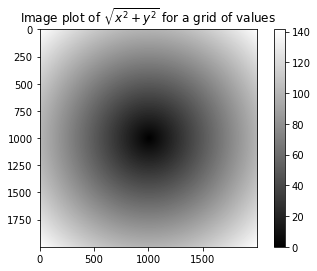

In [8]:
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar() #создаем график плотностей для целевого графика
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values') #подпись к рисунку

# **Запись логических условий в виде операций с массивами**

Функция `numpy.where` — это векторный вариант тернарного выражения `x if condition else y`. Пусть есть булев массив и два массива значений:

In [10]:
xarr = np.arange(1.1,1.6,0.1)
yarr = np.arange(2.1,2.6,0.1)
cond = np.array([True, False, True, True, False])

Допустим, необходимо брать значение из массива `xarr`, если соответствующее значение в массиве `cond` равно `True`, а в противном случае — значение из `yarr`. Эту задачу можно решить следующей операцией спискового включения:

In [13]:
result = [(x if c else y) for x,y,c in zip(xarr,yarr,cond)] #x если верно и y если нет для всех x, y, c в массиве кортежей, собранных из xarr, yarr и cond 
result

[1.1, 2.2, 1.3000000000000003, 1.4000000000000004, 2.5000000000000004]

Для такого кода можно описать ряд проблем. Во-первых, для больших массивов этот код будет работать не быстро (потому что весь код написан на чистом Python). Во-вторых, к многомерным массивам такое решение применить вообще нельзя. С помощью функции `np.where` можно написать такой лаконичный код:

In [15]:
result = np.where(cond,xarr,yarr) #булев массив, массив, откуда брать значения, если True, массив, откуда брать значения, если False
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

Второй и третий аргументы `np.where` не обязаны быть массивами — один или оба могут быть скалярами. При анализе данные `where` обычно применяются, чтобы создать новый массив на основе существующего. Предположим, имеется матрица со случайными данными, и мы хотим заменить все положительные значения на `2`, а все отрицательные — на `-2`. С помощью `np.where` сделать это очень просто:

In [16]:
arr = np.random.randn(4,4)
arr

array([[-0.71277037, -1.65208422,  0.305245  ,  0.5039991 ],
       [ 1.64484211,  1.31057573,  1.0644402 ,  0.28460968],
       [-0.91155567,  0.43816616,  0.13625087,  0.35871014],
       [-0.00716377,  0.57315657,  0.42176238,  0.27192022]])

In [17]:
arr > 0

array([[False, False,  True,  True],
       [ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False,  True,  True,  True]])

In [18]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2,  2,  2,  2],
       [-2,  2,  2,  2],
       [-2,  2,  2,  2]])

С помощью метода `np.where` можно комбинировать скаляры и массивы. Например, можно заменить все положительные элементы `arr` константой `2`:

In [20]:
np.where(arr > 0, 2, arr) #заменяем все положительные элементы константой 2

array([[-0.71277037, -1.65208422,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.91155567,  2.        ,  2.        ,  2.        ],
       [-0.00716377,  2.        ,  2.        ,  2.        ]])

Передавать `where` можно не только массивы одинакового размера или скаляры.

# **Математические и статистические операции**

Среди методов массива есть математические функции, которые вычисляют статистики массива в целом или данных вдоль одной оси. Выполнить агрегирование (часто его называют *редукцией*) типа `sum`, `mean` или стандартного отклонения `std` можно с помощью как метода экземпляра массива, так и функции на верхнем уровне NumPy.

Сгенерируем случайные данные с нормальным распределением и вычислим некоторые агрегаты:

In [21]:
arr = np.random.randn(5,4)
arr

array([[ 1.23833179,  0.93545656, -0.38240633, -0.1000254 ],
       [ 0.77281893,  1.24406501,  0.8361064 , -0.44404238],
       [-0.87342152, -0.10534075, -0.28828568, -0.90974289],
       [ 0.33982133,  0.67290254, -0.7672799 , -0.35815262],
       [ 1.07272223, -0.58718694,  0.63027081,  0.43204682]])

In [22]:
arr.mean() #вычисляем среднее арифметическое для массива

0.16793289981765686

In [23]:
np.mean(arr) #вычисляем среднее арифметическое для массива

0.16793289981765686

In [24]:
arr.sum() #сумма всех элементов массива

3.358657996353137

Функции типа `mean` и `sum` принимают необязательный элемент `axis`, при наличии которого вычисляется статистика по заданной оси. В результате порождается масиив на единицу меньшей размерности:

In [25]:
arr.mean(axis = 1) #вычисляет средние значения по оси 1

array([ 0.42283915,  0.60223699, -0.54419771, -0.02817716,  0.38696323])

In [26]:
arr.sum(axis = 0) #вычисляет сумму всех элементов по оси 0

array([ 2.55027275,  2.15989642,  0.0284053 , -1.37991647])

Здесь `arr.mean(1)` означает "вычислить среднее по столбцам", а `arr.sum(0)` — "вычислить сумму по строкам".
Другие методы, например `cumsum` и `cumprod`, ничего не агрегируют, а порождают массив промежуточных результатов:

In [27]:
arr = np.array([0,1,2,3,4,5,6,7])
arr.cumsum() #вычисляет значение промежуточных сумм

array([ 0,  1,  3,  6, 10, 15, 21, 28])

Для многомерных массивов функция `cumsum` и другие функции с нарастающим итогом возвращают массив того же размера, элементами которого являются частичные агрегаты по указанной оси, высиленные для каждого среза меньшей размерности:

In [29]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [30]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [32]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

Расммотрим список команд, которые можно применять для массивов:

In [ ]:
sum #сумма элементов всего массива или вдоль одной оси. Для массивов нулевой длины функция sum возвращает 0
mean #среднее арифметическое. Для массивов нулевой длины равно NaN
std, var #стандартное отклонение и дисперсия соответственно. Может быть задано число степеней свободы (по умолчанию знаменатель равен n)
min, max #минимум и максимум
argmin, argmax #индексы минимального и максимального элементов
cumsum #нарастающая сумма с начальным значением 0
cumprod #нарастающее произведение с начальным значением 1

# **Методы булевых массивов**

В вышеупомянутых методах булевы значения приводятся к `1` `(True)` и `0` `(False)`, поэтому функция `sum` часто используется для подсчета значений `True` в булевом массиве:

In [33]:
arr = np.random.randn(100)

In [34]:
(arr > 0).sum() #количество положительных значений

44

Но существует еще два метода, `any` и `all`, особенно полезных в случае булевых массивов. Метод `any` проверяет, есть ли в массиве хотя бы одно значение, равное `True`, а `all` — все ли значения в массиве равны `True`:

In [35]:
bools = np.array([False,False,True,False])

In [36]:
bools.any()

True

In [37]:
bools.all()

False

Эти методы работают и не для булевых массивов, и тогда все отличные от нуля элементы считаются равными `True`.

# **Сортировка**

Как и встроенные в Python списки, массивы NumPY можно сортировать на месте методом `sort`:

In [38]:
arr = np.random.randn(6)
arr

array([ 1.43003883,  1.97143324, -1.2087885 , -1.2405901 ,  0.70064383,
       -0.39561894])

In [40]:
arr.sort()
arr

array([-1.2405901 , -1.2087885 , -0.39561894,  0.70064383,  1.43003883,
        1.97143324])

Любой одномерный участок многомерного массива можно отсортировать на месте, передав методу `sort` номер оси:

In [45]:
arr = np.random.randn(5,3)
arr

array([[-0.66256109,  0.43358403, -0.85466188],
       [-0.6325691 ,  0.29558071,  0.50139877],
       [ 0.39793988,  0.93337957, -0.75382317],
       [-1.30424499, -0.4095132 ,  0.2444186 ],
       [ 1.19253748,  1.66904895,  0.41503075]])

In [46]:
arr.sort(0)
arr

array([[-1.30424499, -0.4095132 , -0.85466188],
       [-0.66256109,  0.29558071, -0.75382317],
       [-0.6325691 ,  0.43358403,  0.2444186 ],
       [ 0.39793988,  0.93337957,  0.41503075],
       [ 1.19253748,  1.66904895,  0.50139877]])

Метод верхнего уровня `np.sort` возвращает отсортированноую копию массива, а не сортирует массив на месте. Чтобы вычислить квантили массива, нужно отсортировать его и выбрать значение с конкретным рангом:

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr

In [51]:
large_arr[int(0.05*len(large_arr))] #вычисление 5%-ного квантиля массива

-1.6845209955151772

# **Устранение дубликатов и другие теоретико-множественные операции**

В NumPy имеются основные теоретико-множественные операции для одномерных массивов. Пожалуй, самой употребительной является `np.unique`, она возвращает отсортированное множество уникальных значений в массиве:

In [53]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [55]:
ints = np.array([3,3,3,2,1,4,4,6,8,0,-1,-1])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

Для сравнения напишем код для сортировки для обычного Python:

In [56]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Функция `np.in1d` проверяет, присутствуют ли значения из одного массива в другом, и возвращает булев массив:

In [59]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,1,6])

array([ True, False, False, False,  True, False,  True])

Возможные теоретико-множественные функции, имеющиеся в NumPy:

In [ ]:
unique(x) #вычисляет отсортированное множество уникальных элементов
intersect1d(x, y) #вычисляет отсортированное множество элементов, общих для x и y
union1d(x, y) #вычисляет отсортированное объединение элементов
in1d(x, y) #вычисляет булев массив, показывающий, какие элементы x встречаются в y
setdiff1d(x, y) #вычисляет разность множеств, т. е. элементы, принадлежащие x, но не принадлежащие y
setxor1d(x, y) #симметрическая разность множеств; элементы, принадлежащие одному массиву, но не обоим сразу